In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Build URL for Weather Map API Call with API key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | samoded
Processing Record 3 of Set 1 | esmeraldas
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | clyde river
Processing Record 8 of Set 1 | kupang
Processing Record 9 of Set 1 | shchelyayur
City not found. Skipping...
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | hambantota
Processing Record 12 of Set 1 | olafsvik
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | baruun-urt
Processing Record 15 of Set 1 | liku
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | chokurdakh
Processing Record 18 of Set 1 | camenca
Processing Record 19 of Set 1 | semnan
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | hermanus
Processin

Processing Record 36 of Set 4 | pombas
Processing Record 37 of Set 4 | mukhen
Processing Record 38 of Set 4 | tawkar
City not found. Skipping...
Processing Record 39 of Set 4 | srednekolymsk
Processing Record 40 of Set 4 | narasannapeta
Processing Record 41 of Set 4 | touros
Processing Record 42 of Set 4 | tucuma
Processing Record 43 of Set 4 | tasiilaq
Processing Record 44 of Set 4 | kodiak
Processing Record 45 of Set 4 | pingdingshan
Processing Record 46 of Set 4 | benghazi
Processing Record 47 of Set 4 | north bend
Processing Record 48 of Set 4 | kuche
City not found. Skipping...
Processing Record 49 of Set 4 | ribeira grande
Processing Record 50 of Set 4 | yar-sale
Processing Record 1 of Set 5 | college
Processing Record 2 of Set 5 | hihifo
City not found. Skipping...
Processing Record 3 of Set 5 | hay river
Processing Record 4 of Set 5 | vangaindrano
Processing Record 5 of Set 5 | maricka
Processing Record 6 of Set 5 | xining
Processing Record 7 of Set 5 | bengkulu
Processing Reco

Processing Record 24 of Set 8 | lodwar
Processing Record 25 of Set 8 | harper
Processing Record 26 of Set 8 | yilan
Processing Record 27 of Set 8 | chagda
City not found. Skipping...
Processing Record 28 of Set 8 | henties bay
Processing Record 29 of Set 8 | gushikawa
Processing Record 30 of Set 8 | taylor
Processing Record 31 of Set 8 | dunedin
Processing Record 32 of Set 8 | extrema
Processing Record 33 of Set 8 | bilma
Processing Record 34 of Set 8 | salalah
Processing Record 35 of Set 8 | zhigansk
Processing Record 36 of Set 8 | bathsheba
Processing Record 37 of Set 8 | maragogi
Processing Record 38 of Set 8 | west wendover
Processing Record 39 of Set 8 | abu zabad
Processing Record 40 of Set 8 | barra do garcas
Processing Record 41 of Set 8 | guia de isora
Processing Record 42 of Set 8 | mahibadhoo
Processing Record 43 of Set 8 | oranjestad
Processing Record 44 of Set 8 | san lawrenz
Processing Record 45 of Set 8 | hamilton
Processing Record 46 of Set 8 | tautira
Processing Record

Processing Record 11 of Set 12 | russell
Processing Record 12 of Set 12 | margate
Processing Record 13 of Set 12 | lishui
Processing Record 14 of Set 12 | luzhou
Processing Record 15 of Set 12 | doha
Processing Record 16 of Set 12 | san pedro
Processing Record 17 of Set 12 | malyye derbety
Processing Record 18 of Set 12 | yunjinghong
City not found. Skipping...
Processing Record 19 of Set 12 | egvekinot
Processing Record 20 of Set 12 | abha
Processing Record 21 of Set 12 | soe
Processing Record 22 of Set 12 | nalut
Processing Record 23 of Set 12 | le port
Processing Record 24 of Set 12 | lujan
Processing Record 25 of Set 12 | sechura
Processing Record 26 of Set 12 | kitob
Processing Record 27 of Set 12 | kotdwara
Processing Record 28 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 29 of Set 12 | ixtapa
Processing Record 30 of Set 12 | rosarito
Processing Record 31 of Set 12 | buraydah
Processing Record 32 of Set 12 | samarai
Processing Record 33 of Set 12 | varkkall

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Samoded,100,RU,2021-12-04 12:33:50,83,63.6083,40.5111,4.24,11.63
1,Esmeraldas,40,BR,2021-12-04 12:33:50,68,-19.7625,-44.3139,75.31,8.32
2,Thompson,90,CA,2021-12-04 12:33:51,77,55.7435,-97.8558,-12.84,3.44
3,Rikitea,56,PF,2021-12-04 12:33:51,75,-23.1203,-134.9692,75.52,12.35
4,Ushuaia,0,AR,2021-12-04 12:32:16,50,-54.8000,-68.3000,53.22,6.91
5,Clyde River,100,CA,2021-12-04 12:33:51,85,70.4692,-68.5914,10.63,28.77
6,Kupang,20,ID,2021-12-04 12:33:51,89,-10.1667,123.5833,81.18,1.14
7,Arraial Do Cabo,40,BR,2021-12-04 12:33:52,61,-22.9661,-42.0278,80.56,8.05
8,Hambantota,20,LK,2021-12-04 12:33:52,94,6.1241,81.1185,80.94,3.44
9,Olafsvik,96,IS,2021-12-04 12:33:52,75,64.8945,-23.7142,36.57,10.20


In [28]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Samoded,RU,2021-12-04 12:33:50,63.6083,40.5111,4.24,83,100,11.63
1,Esmeraldas,BR,2021-12-04 12:33:50,-19.7625,-44.3139,75.31,68,40,8.32
2,Thompson,CA,2021-12-04 12:33:51,55.7435,-97.8558,-12.84,77,90,3.44
3,Rikitea,PF,2021-12-04 12:33:51,-23.1203,-134.9692,75.52,75,56,12.35
4,Ushuaia,AR,2021-12-04 12:32:16,-54.8000,-68.3000,53.22,50,0,6.91
5,Clyde River,CA,2021-12-04 12:33:51,70.4692,-68.5914,10.63,85,100,28.77
6,Kupang,ID,2021-12-04 12:33:51,-10.1667,123.5833,81.18,89,20,1.14
7,Arraial Do Cabo,BR,2021-12-04 12:33:52,-22.9661,-42.0278,80.56,61,40,8.05
8,Hambantota,LK,2021-12-04 12:33:52,6.1241,81.1185,80.94,94,20,3.44
9,Olafsvik,IS,2021-12-04 12:33:52,64.8945,-23.7142,36.57,75,96,10.20


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Create a series of scatter plots for each weather parameter against the latitude for all the cities.

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

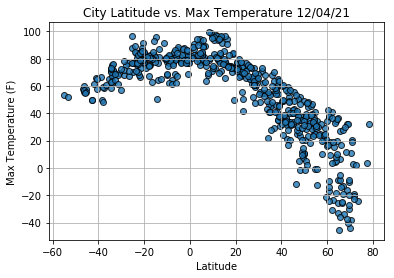

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

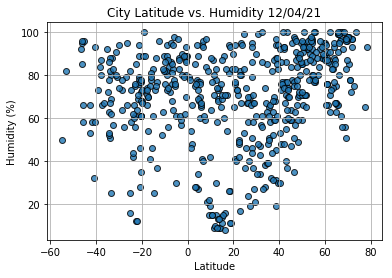

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

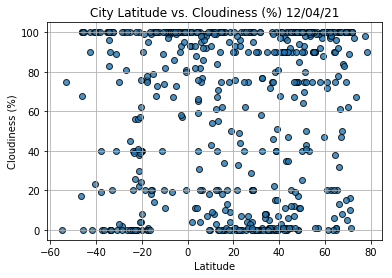

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

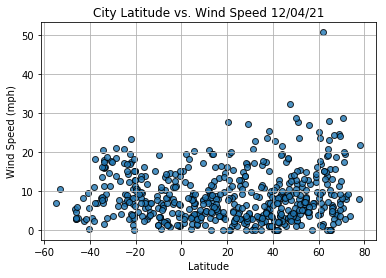

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# To perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres
# we will need to create Northern Hemisphere DataFrames from the city_data_df DataFrame.

# To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame. 
# The loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. 
# The syntax to get a specific row from a current DataFrame is row = df.loc[row_index]

In [30]:
index9 = city_data_df.loc[9]
index9

City                     Olafsvik
Country                        IS
Date          2021-12-04 12:33:52
Lat                       64.8945
Lng                      -23.7142
Max Temp                    36.57
Humidity                       75
Cloudiness                     96
Wind Speed                   10.2
Name: 9, dtype: object

In [31]:
# Return a DataFrame with all data fitting a criteria, latitudes greater than or equal to 0, 
# we can use the loc method on the city_data_df DataFrame.
# Inside the brackets, we would add the conditional filter city_data_df["Lat"] >= 0 

In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Samoded,RU,2021-12-04 12:33:50,63.6083,40.5111,4.24,83,100,11.63
2,Thompson,CA,2021-12-04 12:33:51,55.7435,-97.8558,-12.84,77,90,3.44
5,Clyde River,CA,2021-12-04 12:33:51,70.4692,-68.5914,10.63,85,100,28.77
8,Hambantota,LK,2021-12-04 12:33:52,6.1241,81.1185,80.94,94,20,3.44
9,Olafsvik,IS,2021-12-04 12:33:52,64.8945,-23.7142,36.57,75,96,10.20


In [33]:
# Assign this DataFrame to the variable northern_hemi_df to access the data to perform linear regression.
# Aame approach to get the cities for the Southern Hemisphere for latitudes less than 0.

# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

## Perform Linear Regression on the Maximum Temperature

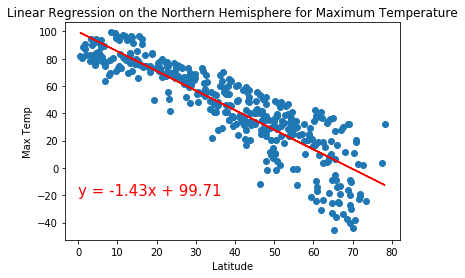

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',(0,-20))

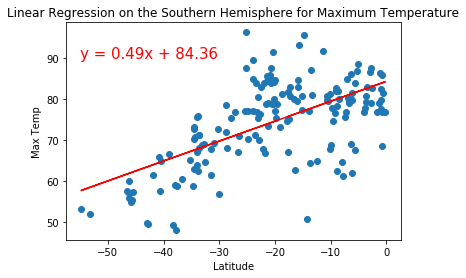

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-55,90))

## Perform Linear Regression for other climate variables

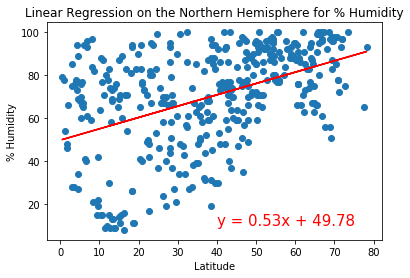

In [45]:
# Linear regression on the Northern Hemisphere for Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

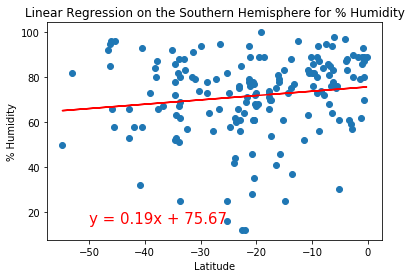

In [47]:
# Linear regression on the Southern Hemisphere for Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

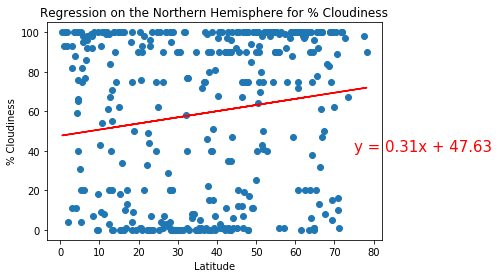

In [54]:
# Linear regression on the Northern Hemisphere for Cloudiness

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(75,40))

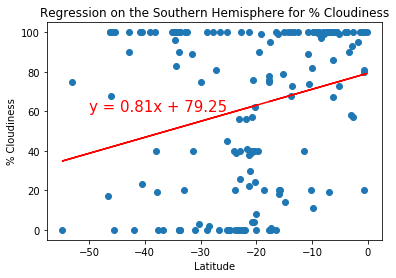

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

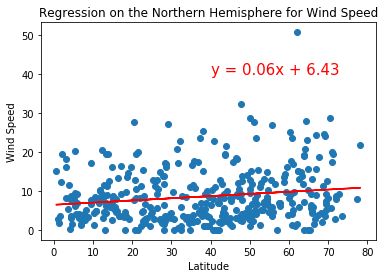

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,40))

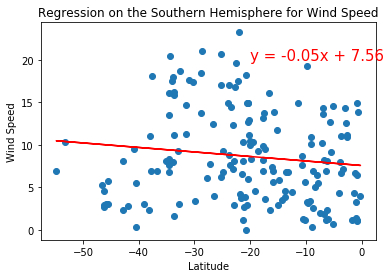

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-20,20))